In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Một ảnh gif thì gồm 2 phần:
- Ma trận chỉ số của bảng màu
- Bảng màu  

Ảnh có kích thước 16x16 thì:
- Ma  trận chỉ số sẽ gồm 16*16 chỉ số
    - Tức là gồm 16 phần tử mỗi phần tử có 16 chỉ số
- Bảng màu là một danh sách gồm 768 phần tử. Trong đó:
    - Gồm bảng màu của 3 màu RGB. Tức là:
        - 256 giá trị màu * 3 = 768 phần tử

### Đọc file ảnh gif

In [2]:
imgLena = Image.open("lena_small.gif")
print(imgLena)
print(type(imgLena))

<PIL.GifImagePlugin.GifImageFile image mode=P size=16x16 at 0x28E3A483848>
<class 'PIL.GifImagePlugin.GifImageFile'>


---
### Lấy ma trận chỉ số của bảng màu
#### Lấy thông tin kích thước và kiểu dữ liệu

In [3]:
pixels = np.array(imgLena)
print(type(pixels))
print(pixels.shape)
print(len(pixels))

<class 'numpy.ndarray'>
(16, 16)
16


#### Lấy ma trận chỉ số

In [4]:
print(pixels)

[[188 230 134 181 182 182 181 182 182 182 182 230 188 188 182 133]
 [230 188 133 182 182 182 188 188 182 181 182 194 182 243 133  43]
 [140 230 133 139 181 140 182 195 202 140 182 182 230 182  43  92]
 [133 230 134 182 182 182 188 195 244 202 181  91 195  85  85 194]
 [133 194 133 182 139 182 188 237 195 195 195 237 250  43 182 189]
 [175 237 127 140 182 182 188 140 140 195 244 195 140  85 195 188]
 [134 236 133 181 194 182  92  43 189 195 182 140  43 140 194 188]
 [133 236  86 181 182  43  85 195 188 195 237  91  85 237 188 189]
 [133 237 133 140  92  92 140 182 140 189 133  92  91 189 188 188]
 [ 85 236 140  98  85  91 140 182 237 188 182  91 182 188 188 201]
 [133 236 134  92  98 141  91 224 182 188 134  91 189 188 195 243]
 [ 85 237  91  92 189  85  85 139 224 188  43 134 194 140 243 244]
 [ 92 236  92  92 141  98  43 133 182 195 140 133 182 140 243  85]
 [ 98 236  43  85  98 140  85 182 188 230 250 140 188 195 188 139]
 [134 237  91  85  92  92  91 182 182 182 195 195  92 236 133 

In [5]:
print(pixels[0])

[188 230 134 181 182 182 181 182 182 182 182 230 188 188 182 133]


---
### Lấy bảng màu

In [6]:
lstTblColor = imgLena.getpalette()
print(type(lstTblColor))
print("Kích thước: " + str(len(lstTblColor)))  # = 768 = 256 * 3   (256 là số bit của 1 bảng màu | 3 là số màu của ảnh RGB)
print(lstTblColor)

<class 'list'>
Kích thước: 768
[0, 0, 0, 0, 0, 51, 0, 0, 102, 0, 0, 153, 0, 0, 204, 0, 0, 255, 0, 43, 0, 0, 43, 51, 0, 43, 102, 0, 43, 153, 0, 43, 204, 0, 43, 255, 0, 85, 0, 0, 85, 51, 0, 85, 102, 0, 85, 153, 0, 85, 204, 0, 85, 255, 0, 128, 0, 0, 128, 51, 0, 128, 102, 0, 128, 153, 0, 128, 204, 0, 128, 255, 0, 170, 0, 0, 170, 51, 0, 170, 102, 0, 170, 153, 0, 170, 204, 0, 170, 255, 0, 213, 0, 0, 213, 51, 0, 213, 102, 0, 213, 153, 0, 213, 204, 0, 213, 255, 0, 255, 0, 0, 255, 51, 0, 255, 102, 0, 255, 153, 0, 255, 204, 0, 255, 255, 51, 0, 0, 51, 0, 51, 51, 0, 102, 51, 0, 153, 51, 0, 204, 51, 0, 255, 51, 43, 0, 51, 43, 51, 51, 43, 102, 51, 43, 153, 51, 43, 204, 51, 43, 255, 51, 85, 0, 51, 85, 51, 51, 85, 102, 51, 85, 153, 51, 85, 204, 51, 85, 255, 51, 128, 0, 51, 128, 51, 51, 128, 102, 51, 128, 153, 51, 128, 204, 51, 128, 255, 51, 170, 0, 51, 170, 51, 51, 170, 102, 51, 170, 153, 51, 170, 204, 51, 170, 255, 51, 213, 0, 51, 213, 51, 51, 213, 102, 51, 213, 153, 51, 213, 204, 51, 213, 255, 51, 2

#### Chuyển bảng màu dạng list thành dạng ma trận 3 chiều:
Ref: https://opensourceoptions.com/blog/numpy-array-shapes-and-reshaping-arrays/
- Với:
    - 1 lớp dữ liệu (1 layer)
    - 256 dòng dữ liệu
    - 3 cột tương ứng 3 giá trị là index của 3 màu RGB

In [7]:
palette = imgLena.getpalette()

In [8]:
# Chuyển sang kiểu numpy
nparrayImg = np.array(palette)
print(type(nparrayImg))
print(nparrayImg.shape)
# print(nparrayImg)

<class 'numpy.ndarray'>
(768,)


In [9]:
# Chuyển mảng 1 chiều thành mảng 3 chiều
npReshape = nparrayImg.reshape((1,-1,3))  # Tham số đầu = 1: Số lớp
                                          # Tham số thứ hai = -1 hoặc 256: Số dòng  (Bằng -1 thì khi đó dựa vào 2 tham số còn lại để tính)
                                          # Tham số ba = 3: Số phần tử của mỗi dòng (Số cột)
print(type(npReshape))
print(npReshape.shape)
# print(npReshape)
print(npReshape[0][:10])
print(npReshape[0][0][1])

<class 'numpy.ndarray'>
(1, 256, 3)
[[  0   0   0]
 [  0   0  51]
 [  0   0 102]
 [  0   0 153]
 [  0   0 204]
 [  0   0 255]
 [  0  43   0]
 [  0  43  51]
 [  0  43 102]
 [  0  43 153]]
0


#### Hiển thị bảng màu

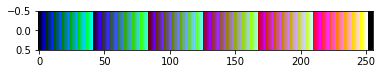

In [10]:
plt.imshow(npReshape, aspect = 30)    # Điều chỉnh aspect để tăng chiều rộng

In [11]:
# plt.imshow(npReshape[0][:], extent=[-500, 500, -500, 500])

## Hiển thị ảnh lên từ bảng màu và dãy chỉ số

(16, 16, 3)


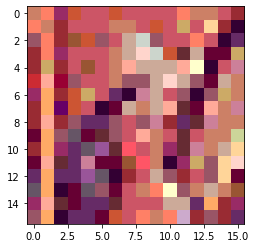

In [12]:
rgb_pixels = npReshape[0,pixels] # "0" Là layer thứ 0 | "pixels" là ma trận chỉ số
print(rgb_pixels.shape)
plt.imshow(rgb_pixels)

**Ảnh mờ do chỉ được biểu diển bởi 16x16 pixels**

## Truy xuất

### Truy xuất từng dòng dữ liệu pixels

Lấy dòng đầu tiên của ma trận chứa index bảng màu:
[188 230 134 181 182 182 181 182 182 182 182 230 188 188 182 133]
Lấy RGB của của dòng đầu tiên dựa trên bảng màu và index:
(16, 3)
[[204 128 102]
 [255 128 102]
 [153  43 102]
 [204  85  51]
 [204  85 102]
 [204  85 102]
 [204  85  51]
 [204  85 102]
 [204  85 102]
 [204  85 102]
 [204  85 102]
 [255 128 102]
 [204 128 102]
 [204 128 102]
 [204  85 102]
 [153  43  51]]
Chuyển thành mảng 3 chiều rồi hiển thị pixels nên:
(1, 16, 3)
[[[204 128 102]
  [255 128 102]
  [153  43 102]
  [204  85  51]
  [204  85 102]
  [204  85 102]
  [204  85  51]
  [204  85 102]
  [204  85 102]
  [204  85 102]
  [204  85 102]
  [255 128 102]
  [204 128 102]
  [204 128 102]
  [204  85 102]
  [153  43  51]]]


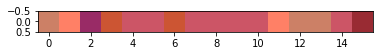

In [13]:
print("Lấy dòng đầu tiên của ma trận chứa index bảng màu:")
pixels_rows0 = pixels[0]
print(pixels_rows0)
# --------------------------------------------------------------
print("Lấy RGB của của dòng đầu tiên dựa trên bảng màu và index:")
rgb_pixels_rows0 = npReshape[0, pixels_rows0]
print(rgb_pixels_rows0.shape)
print(rgb_pixels_rows0)
# --------------------------------------------------------------
print("Chuyển thành mảng 3 chiều rồi hiển thị pixels nên:")
rgb_pixels_rows0_3D = rgb_pixels_rows0.reshape(1,-1,3)
print(rgb_pixels_rows0_3D.shape)
print(rgb_pixels_rows0_3D)
plt.imshow(rgb_pixels_rows0_3D)

**Giống với lát cắt đầu tiên của ảnh**

### Truy xuất từng pixels một

Lấy pixels tại vị trí dòng đầu tiên - cột đầu tiên => Lấy được index của bảng màu:
()
188
Lấy RGB của pixels dựa trên bảng màu và index:
(3,)
[204 128 102]
Chuyển thành mảng 3 chiều rồi hiển thị pixels nên:
(1, 1, 3)
[[[204 128 102]]]


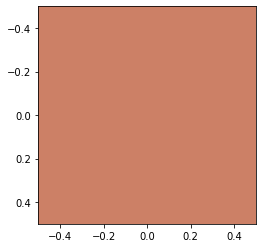

In [14]:
print("Lấy pixels tại vị trí dòng đầu tiên - cột đầu tiên => Lấy được index của bảng màu:")
pixels_idx00 = pixels[0][0] 
print(pixels_idx00.shape) 
print(pixels_idx00)        
# --------------------------------------------------------------
print("Lấy RGB của pixels dựa trên bảng màu và index:")
rgb_pixels_idx00 = npReshape[0, pixels_idx00]   
print(rgb_pixels_idx00.shape)
print(rgb_pixels_idx00)
# --------------------------------------------------------------
print("Chuyển thành mảng 3 chiều rồi hiển thị pixels nên:")
rgb_pixels_idx00_3D = rgb_pixels_idx00.reshape(1,1,3)
print(rgb_pixels_idx00_3D.shape)
print(rgb_pixels_idx00_3D)
plt.imshow(rgb_pixels_idx00_3D)

**Giống với pixels đầu tiên của ảnh**